In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
# import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [23]:
# from sklearn.datasets import load_iris
# iris = load_iris()

# import some data to play with
iris = pd.read_csv('tips.csv')

In [24]:
iris

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,Dinner,3
240,27.18,2.00,0,1,Sat,Dinner,2
241,22.67,2.00,1,1,Sat,Dinner,2
242,17.82,1.75,1,0,Sat,Dinner,2


In [26]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['time']) 

In [27]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: Species, Length: 244, dtype: int64

In [30]:
y.unique()

array([0, 1], dtype=int64)

In [31]:
iris['Species'].unique()

array([0, 1], dtype=int64)

In [32]:
iris.Species.value_counts()

0    176
1     68
Name: Species, dtype: int64

In [33]:
colnames = list(iris.columns)
colnames

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'Species']

In [34]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [35]:
len(x_train) , len(x_test)

(195, 49)

### Building Decision Tree Classifier using Entropy Criteria

In [36]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[0] <= 16.44\nentropy = 0.797\nsamples = 195\nvalue = [148, 47]'),
 Text(0.25, 0.625, 'X[1] <= 2.56\nentropy = 0.934\nsamples = 83\nvalue = [54, 29]'),
 Text(0.125, 0.375, 'X[2] <= 0.5\nentropy = 0.986\nsamples = 65\nvalue = [37, 28]'),
 Text(0.0625, 0.125, 'entropy = 0.975\nsamples = 27\nvalue = [11, 16]'),
 Text(0.1875, 0.125, 'entropy = 0.9\nsamples = 38\nvalue = [26, 12]'),
 Text(0.375, 0.375, 'X[0] <= 15.895\nentropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.75, 0.625, 'X[1] <= 3.96\nentropy = 0.636\nsamples = 112\nvalue = [94, 18]'),
 Text(0.625, 0.375, 'X[0] <= 24.175\nentropy = 0.485\nsamples = 76\nvalue = [68, 8]'),
 Text(0.5625, 0.125, 'entropy = 0.619\nsamples = 52\nvalue = [44, 8]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.875, 0.375, 'X[0] <= 44.68\nentropy = 0.852\nsampl

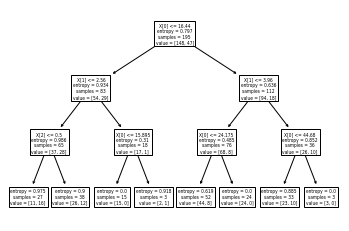

In [37]:
#PLot the decision tree
tree.plot_tree(model)

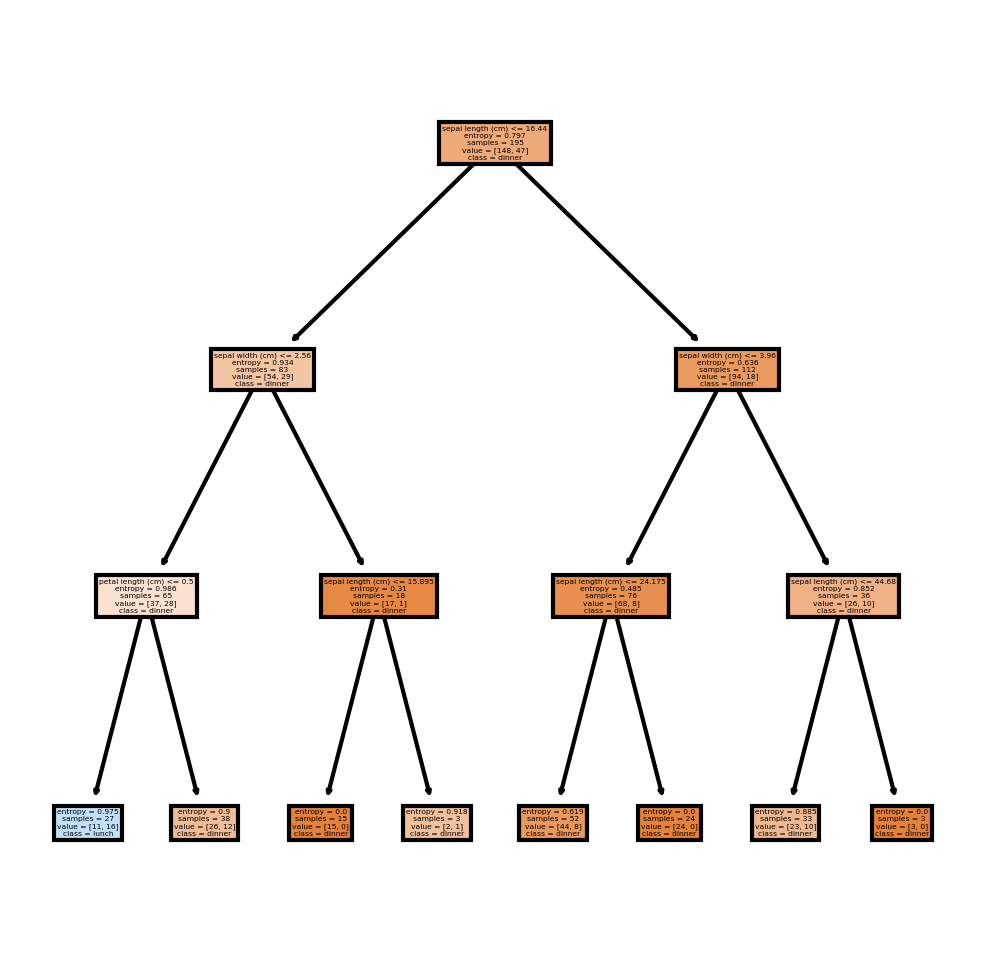

In [39]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['dinner','lunch']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [45]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0], dtype=int64)

In [43]:
x_test

,total_bill,tip,sex,smoker
29,19.65,3.00,0,0
146,18.64,1.36,0,0
75,10.51,1.25,1,0
18,16.97,3.50,0,0
132,11.17,1.50,0,0
11,35.26,5.00,0,0
215,12.90,1.10,0,1
233,10.77,1.47,1,0
126,8.52,1.48,1,0
149,7.51,2.00,1,0


In [59]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [60]:
# Accuracy 
np.mean(preds==y_test)

0.9666666666666667

### Building Decision Tree Classifier (CART) using Gini Criteria

In [61]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [62]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [63]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

#### Decision Tree Regression Example

In [65]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [66]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [68]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [69]:
#Find the accuracy
model.score(X_test,y_test)

0.8761856165205907

In [64]:
# model.decision_path()

In [17]:
import seaborn as sns

In [20]:
# sns.load_dataset('tips')